In [67]:
import time
import tensorflow as tf
from keras import Sequential
import keras.utils.np_utils as kutils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [70]:
model = Sequential()
keras_model = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_shape = (32,32,3))
model.add(keras_model.layers[-1].output)

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

TypeError: The added layer must be an instance of class Layer. Received: layer=KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'") of type <class 'keras.engine.keras_tensor.KerasTensor'>.

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(32, 32),
        batch_size=20000,
        class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(32, 32),
        batch_size=2500,
        class_mode='binary')

print("Classes of data: ", train_generator.class_indices)
data_train = train_generator.next()
data_test = test_generator.next()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Classes of data:  {'cats': 0, 'dogs': 1}


In [21]:
(x_train, y_train) = data_train
(x_test, y_test) = data_test

In [4]:
# model = Sequential()
# layers = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = 2)
# model.add(layers)
# model.add(Flatten())
# model.add(Dense(1,activation='sigmoid'))

In [5]:

# baseModel= tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = 2)

# out=baseModel.layers[-1].output
# out = Flatten()(out)
# output = Dense(1, activation='sigmoid')(out)

# model = tf.keras.models.Model(inputs=baseModel.input, outputs=output)
# model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [6]:
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 29, 29, 64)     

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8)

In [64]:
start_time = time.time()

history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=1, validation_split=0.1), callbacks=[early_stopping])

print("--- %s seconds ---" % (time.time() - start_time))

loss = history.history['loss']

Epoch 1/100
180/180 [==============================] - 29s 161ms/step - loss: 0.7607 - accuracy: 0.6385 - val_loss: 0.7696 - val_accuracy: 0.4990
Epoch 2/100
180/180 [==============================] - 27s 151ms/step - loss: 0.5682 - accuracy: 0.7138 - val_loss: 1.3407 - val_accuracy: 0.5045
Epoch 3/100
180/180 [==============================] - 27s 152ms/step - loss: 0.4994 - accuracy: 0.7564 - val_loss: 0.6226 - val_accuracy: 0.6735
Epoch 4/100
180/180 [==============================] - 27s 151ms/step - loss: 0.4570 - accuracy: 0.7837 - val_loss: 1.2164 - val_accuracy: 0.5345
Epoch 5/100
180/180 [==============================] - 27s 151ms/step - loss: 0.4255 - accuracy: 0.8019 - val_loss: 0.4916 - val_accuracy: 0.7725
Epoch 6/100
180/180 [==============================] - 28s 156ms/step - loss: 0.3989 - accuracy: 0.8177 - val_loss: 0.5412 - val_accuracy: 0.7500
Epoch 7/100
180/180 [==============================] - 26s 146ms/step - loss: 0.3801 - accuracy: 0.8279 - val_loss: 0.4228 -

Epoch 57/100
180/180 [==============================] - 26s 146ms/step - loss: 0.0573 - accuracy: 0.9784 - val_loss: 0.5893 - val_accuracy: 0.8475
Epoch 58/100
180/180 [==============================] - 26s 145ms/step - loss: 0.0520 - accuracy: 0.9812 - val_loss: 0.6546 - val_accuracy: 0.8450
Epoch 59/100
180/180 [==============================] - 26s 145ms/step - loss: 0.0556 - accuracy: 0.9789 - val_loss: 0.6747 - val_accuracy: 0.8385
Epoch 60/100
180/180 [==============================] - 26s 145ms/step - loss: 0.0543 - accuracy: 0.9791 - val_loss: 0.5975 - val_accuracy: 0.8385
Epoch 61/100
180/180 [==============================] - 26s 147ms/step - loss: 0.0567 - accuracy: 0.9799 - val_loss: 0.8312 - val_accuracy: 0.8140
Epoch 62/100
 15/180 [=>............................] - ETA: 23s - loss: 0.0419 - accuracy: 0.9853

KeyboardInterrupt: 

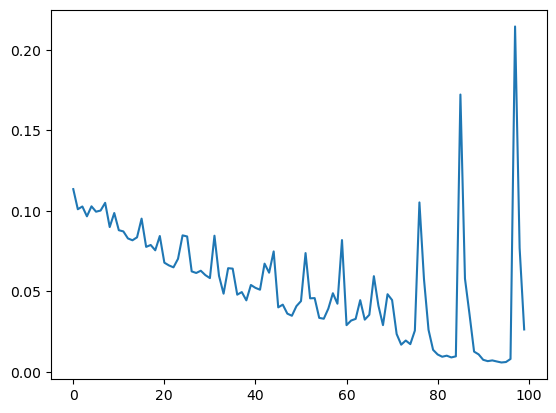

In [72]:
import matplotlib.pyplot as plt
loss = history.history['loss']
plt.plot(loss)

In [66]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 1s 15ms/step - loss: 0.5379 - accuracy: 0.8588


[0.5379365682601929, 0.8587999939918518]